<a href="https://colab.research.google.com/github/numnums021/Colaboratory/blob/main/%D0%A1%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Современные технологии программирования. 
3 семестр. 
Фомин Д.А.
1 - вариант.
Предсказание дефолта по кредиту.

In [1]:
import pandas as pd # для корректной работы с данными
%matplotlib inline
import matplotlib.pyplot as plt # для визуализации
import numpy as np # удобно использовать операции над массивами
import seaborn as sns # ставим красивый стиль
import warnings # убираем предупреждения

from sklearn.tree import DecisionTreeClassifier # классификатор дерева решений
from sklearn.model_selection import KFold # k-folf кросс-валидация
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества

sns.set_style('whitegrid') # установить стиль whitegrid
warnings.filterwarnings("ignore")

In [2]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

In [3]:
training_data = pd.read_csv('training_data.csv')
#training_data.sample(10, random_state=123)
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

In [5]:
train_mean = training_data.mean()
train_mean

SeriousDlqin2yrs                           0.066860
RevolvingUtilizationOfUnsecuredLines       7.927880
age                                       52.240520
NumberOfTime30-59DaysPastDueNotWorse       0.428220
DebtRatio                                352.441921
MonthlyIncome                           6642.232222
NumberOfOpenCreditLinesAndLoans            8.476040
NumberOfTimes90DaysLate                    0.269920
NumberRealEstateLoansOrLines               1.017500
NumberOfTime60-89DaysPastDueNotWorse       0.246040
NumberOfDependents                         0.756180
dtype: float64

In [6]:
training_data.fillna(train_mean, inplace=True)
training_data.count()

SeriousDlqin2yrs                        50000
RevolvingUtilizationOfUnsecuredLines    50000
age                                     50000
NumberOfTime30-59DaysPastDueNotWorse    50000
DebtRatio                               50000
MonthlyIncome                           50000
NumberOfOpenCreditLinesAndLoans         50000
NumberOfTimes90DaysLate                 50000
NumberRealEstateLoansOrLines            50000
NumberOfTime60-89DaysPastDueNotWorse    50000
NumberOfDependents                      50000
dtype: int64

In [7]:
target_variable_name = 'SeriousDlqin2yrs'

In [8]:
training_data[target_variable_name].value_counts()

0    46657
1     3343
Name: SeriousDlqin2yrs, dtype: int64

In [9]:
training_values = training_data[target_variable_name]
training_values.head()

0    0
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [10]:
training_values.shape

(50000,)

In [11]:
training_points = training_data.drop(target_variable_name, axis=1)
training_data.shape

(50000, 11)

In [12]:
training_points.shape

(50000, 10)

In [13]:
from sklearn import linear_model, ensemble

In [14]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model = linear_model.LogisticRegression(max_iter=200) # создаем модель

In [15]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=123)
random_forest_model

RandomForestClassifier(random_state=123)

In [16]:
logistic_regression_model.fit(training_points, training_values)

LogisticRegression(max_iter=200)

In [17]:
random_forest_model.fit(training_points, training_values)

RandomForestClassifier(random_state=123)

In [ ]:
##############################################################################

In [31]:
test_data = pd.read_csv('test_data.csv')
test_data.sample(10, )

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
31445,0,0.175808,60,0,0.198256,2980.0,5,0,0,0,1.0
29533,0,0.150151,51,0,0.397942,6412.0,9,0,1,1,1.0
30654,0,0.000000,45,0,0.427796,7000.0,13,0,2,0,2.0
9524,0,0.004914,29,0,0.341179,4800.0,12,0,0,0,0.0
1906,0,0.301932,36,1,0.574787,7527.0,12,0,2,0,0.0
34162,0,0.084740,60,1,0.226164,8400.0,12,0,1,0,0.0
15006,0,0.198880,45,2,0.300254,18500.0,12,0,2,0,2.0
13807,0,0.110994,68,0,0.010525,6270.0,6,0,0,0,0.0
23601,0,0.142026,66,0,0.375125,5000.0,18,1,1,0,2.0
16049,0,1.000000,38,0,0.032978,3850.0,0,0,0,0,2.0


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         30044 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    36521 non-null  float64
dtypes: float64(4), 

In [33]:
test_data.fillna(train_mean, inplace = True)
test_data.count()

SeriousDlqin2yrs                        37500
RevolvingUtilizationOfUnsecuredLines    37500
age                                     37500
NumberOfTime30-59DaysPastDueNotWorse    37500
DebtRatio                               37500
MonthlyIncome                           37500
NumberOfOpenCreditLinesAndLoans         37500
NumberOfTimes90DaysLate                 37500
NumberRealEstateLoansOrLines            37500
NumberOfTime60-89DaysPastDueNotWorse    37500
NumberOfDependents                      37500
dtype: int64

In [34]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)
pd.value_counts(test_predictions_logistic_regression)

0    37333
1      167
dtype: int64

In [35]:
pd.value_counts(test_predictions_random_forest)

0    36621
1      879
dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_random_forest))
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.93264
0.93392
0.9326133333333333


In [37]:
from sklearn.metrics import confusion_matrix

logistic_regression_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
logistic_regression_confusion_matrix

logistic_regression_confusion_matrix = pd.DataFrame(
logistic_regression_confusion_matrix,
index=['y_true=0','y_true=1'],
columns=['y_predicted=0','y_predicted=1']
)
logistic_regression_confusion_matrix


,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [38]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(
                                              random_forest_confusion_matrix,
                                              index=['y_true=0','y_true=1'],
                                              columns=['y_predicted=0','y_predicted=1']
                                             )
random_forest_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [39]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(
                                              random_forest_confusion_matrix,
                                              index=['y_true=0','y_true=1'],
                                              columns=['y_predicted=0','y_predicted=1']
                                             )
random_forest_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [43]:
test_probabilities = logistic_regression_model.predict_proba(test_points)
test_probabilities[:, 1]

array([0.12005388, 0.33941002, 0.10100953, ..., 0.03266722, 0.02054536,
       0.06530698])

In [41]:
test_probabilities = test_probabilities[:5, :]
test_probabilities

array([[0.87994612, 0.12005388],
       [0.66058998, 0.33941002],
       [0.89899047, 0.10100953],
       [0.90109991, 0.09890009],
       [0.8078839 , 0.1921161 ]])

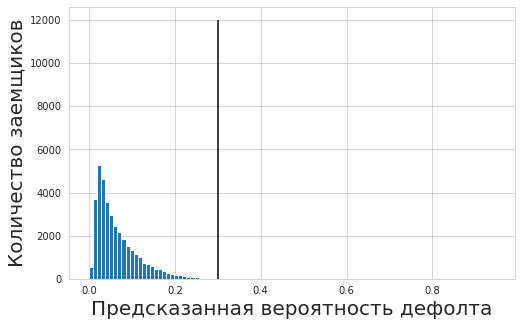

In [44]:
test_probabilities = test_probabilities[:, 1]
plt.figure(figsize=(8, 5))
plt.hist(test_probabilities, bins=100)
plt.vlines(0.3, 0, 12000)
plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

In [45]:
higher_threshold = 0.7
alternative_test_predictions = np.where(test_probabilities > higher_threshold, 1, 0)
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, test_predictions_random_forest))
alternative_confusion_matrix

,0,1
0,34558,415
1,2063,464


In [46]:
higher_threshold = 0.3
alternative_test_predictions = np.where(test_probabilities > higher_threshold, 1, 0)
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, test_predictions_random_forest))
alternative_confusion_matrix

,0,1
0,34558,415
1,2063,464


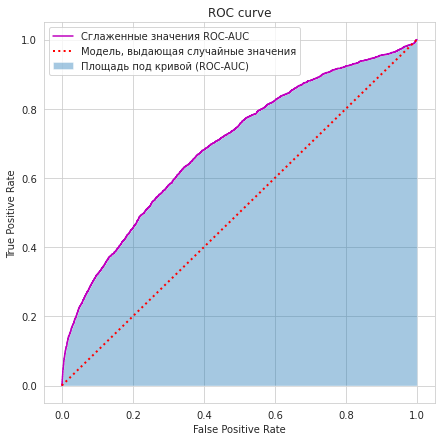

In [53]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)
# создаём график
plt.figure(figsize=(7,7))
# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, color='m', label = 'Сглаженные значения ROC-AUC')
# кривая соответствующая случайному угадыванию
plt.plot([0,1],[0,1],color='r',lw=2,linestyle=':',label = 'Модель, выдающая случайные значения')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(false_positive_rates, true_positive_rates,step='mid',alpha=0.4,label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_value = roc_auc_score(test_values, test_probabilities)
print("ROC-AUC на тестовой выборке: ", roc_auc_value)

ROC-AUC на тестовой выборке:  0.6931090467199803


In [ ]:
############################################################################ 

КОНЕЦ ОСНОВНОЙ РАБОТЫ

ДАЛЕЕ ЛИЧНЫЕ ЭКСПЕРИМЕНТЫ

In [18]:
test_data = pd.read_csv('test_data.csv')
train_mean

SeriousDlqin2yrs                           0.066860
RevolvingUtilizationOfUnsecuredLines       7.927880
age                                       52.240520
NumberOfTime30-59DaysPastDueNotWorse       0.428220
DebtRatio                                352.441921
MonthlyIncome                           6642.232222
NumberOfOpenCreditLinesAndLoans            8.476040
NumberOfTimes90DaysLate                    0.269920
NumberRealEstateLoansOrLines               1.017500
NumberOfTime60-89DaysPastDueNotWorse       0.246040
NumberOfDependents                         0.756180
dtype: float64

In [19]:
test_data.fillna(train_mean, inplace=True)
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)
test_points.shape

(37500, 10)

In [20]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

In [21]:
pd.value_counts(test_predictions_logistic_regression)

0    37333
1      167
dtype: int64

In [22]:
pd.value_counts(test_predictions_random_forest)

0    36621
1      879
dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_random_forest))

0.93264
0.93392


In [24]:
test_values

0        0
1        1
2        0
3        0
4        1
        ..
37495    0
37496    0
37497    0
37498    0
37499    0
Name: SeriousDlqin2yrs, Length: 37500, dtype: int64

In [25]:
np.zeros_like(test_values)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.9326133333333333


In [27]:
from sklearn.metrics import confusion_matrix

logistic_regression_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
logistic_regression_confusion_matrix

array([[34558,   415],
       [ 2063,   464]])

In [28]:
logistic_regression_confusion_matrix = pd.DataFrame(
logistic_regression_confusion_matrix,
index=['y_true=0','y_true=1'],
columns=['y_predicted=0','y_predicted=1']
)
logistic_regression_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [29]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(
                                              random_forest_confusion_matrix,
                                              index=['y_true=0','y_true=1'],
                                              columns=['y_predicted=0','y_predicted=1']
                                             )
random_forest_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [ ]:
test_probabilities = logistic_regression_model.predict_proba(test_points)
test_probabilities[:, 1]

array([[0.87994612, 0.12005388],
       [0.66058998, 0.33941002],
       [0.89899047, 0.10100953],
       [0.90109991, 0.09890009],
       [0.8078839 , 0.1921161 ]])

In [ ]:
test_probabilities = test_probabilities[:, 1]
test_probabilities

array([0.12005388, 0.33941002, 0.10100953, ..., 0.03266722, 0.02054536,
       0.06530698])

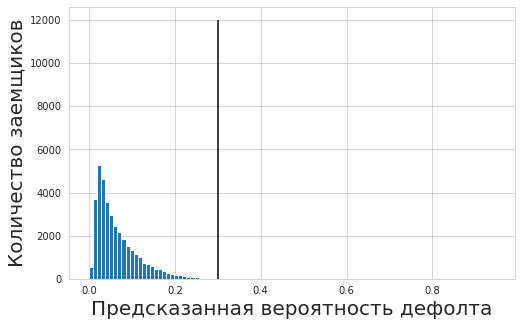

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(test_probabilities, bins=100)
plt.vlines(0.3, 0, 12000)
plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

In [ ]:
higher_threshold = 0.2
test_probabilities

array([0.12005388, 0.33941002, 0.10100953, ..., 0.03266722, 0.02054536,
       0.06530698])

In [ ]:
alternative_test_predictions = np.where(test_probabilities > higher_threshold, 1, 0)
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, test_predictions_random_forest))
alternative_confusion_matrix

,0,1
0,34558,415
1,2063,464


In [ ]:
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix,
                                                    index=['y_true=0','y_true=1'],
                                                    columns=['y_predicted=0','y_predicted=1']
                                                    )
logistic_regression_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464


In [ ]:
Делаем порог = 0.3

In [ ]:
higher_threshold = 0.3
test_probabilities

array([0.12005388, 0.33941002, 0.10100953, ..., 0.03266722, 0.02054536,
       0.06530698])

In [ ]:
alternative_test_predictions = np.where(test_probabilities > higher_threshold, 1, 0)
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, test_predictions_random_forest))
alternative_confusion_matrix

,0,1
0,34558,415
1,2063,464


In [ ]:
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix,
                                                    index=['y_true=0','y_true=1'],
                                                    columns=['y_predicted=0','y_predicted=1']
                                                    )
logistic_regression_confusion_matrix

,y_predicted=0,y_predicted=1
y_true=0,34558,415
y_true=1,2063,464
